In [1]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
#Read excel file from the current working directory
GA = pd.ExcelFile('EP - Change 2022_GA writeback_091122.xlsx')

In [3]:
#Now you listing all sheets in the file
GA.sheet_names

['Goal stats - web traffic',
 'General stats - web traffic',
 'Change_2022_Google Analytics Ma']

In [4]:
#Read excel file from the current working directory
GA_1 = pd.read_excel('EP - Change 2022_GA writeback_091122.xlsx',sheet_name="Goal stats - web traffic")
GA_2 = pd.read_excel('EP - Change 2022_GA writeback_091122.xlsx',sheet_name="General stats - web traffic")
GA_3 = pd.read_excel('EP - Change 2022_GA writeback_091122.xlsx',sheet_name="Change_2022_Google Analytics Ma")

### First DataFrame

In [5]:
#View First DataFrame: Goal stats - web traffic
GA_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16509 entries, 0 to 16508
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     16509 non-null  datetime64[ns]
 1   Campaign                 16509 non-null  object        
 2   Audience                 4242 non-null   object        
 3   Creative - Family        16509 non-null  object        
 4   Creative - Version       16509 non-null  object        
 5   Platform                 4549 non-null   object        
 6   Ad Format                4427 non-null   object        
 7   Goal                     16509 non-null  object        
 8   Completions              16509 non-null  float64       
 9   Campaign Traffic?        16509 non-null  object        
 10  Days away from max date  16509 non-null  float64       
 11  Latest report?           16509 non-null  int64         
dtypes: datetime64[ns](1), float64(2)

In [6]:
#View the first five rows
GA_1.head(5)
print(GA_1)

            Date              Campaign            Audience Creative - Family  \
0     2022-04-01             (not set)                 NaN         (not set)   
1     2022-04-01             (not set)                 NaN         (not set)   
2     2022-04-01             (not set)                 NaN         (not set)   
3     2022-04-01             (not set)                 NaN         (not set)   
4     2022-04-01             (not set)                 NaN         (not set)   
...          ...                   ...                 ...               ...   
16504 2022-10-25  FY23_broker_campaign                 NaN   UnfairAdvantage   
16505 2022-10-26  FY23_broker_campaign                 NaN   UnfairAdvantage   
16506 2022-10-26  FY23_broker_campaign                 NaN   UnfairAdvantage   
16507 2022-10-26  FY23_broker_campaign                 NaN   UnfairAdvantage   
16508 2022-10-28          Brand_Phrase  General Targetting           SEM Ads   

          Creative - Version        Pla

In [7]:
#Determine if there are any null values
GA_1.isnull().sum()

Date                           0
Campaign                       0
Audience                   12267
Creative - Family              0
Creative - Version             0
Platform                   11960
Ad Format                  12082
Goal                           0
Completions                    0
Campaign Traffic?              0
Days away from max date        0
Latest report?                 0
dtype: int64

Things to note:
- Above command shows there are missing values in some columns. Therefore we can remove these individualds from the dataset.
- In the Audience column if we look at the options there should be only 6 different audiences. However there is a category of 1to4 which doesn't fit. We can remove these individuals from the dataset.
- In the campaign column there is an option as 2022. This doesn't seem to make sense because the campaigns only occur during 2022 in August and October. So we can potentially remove these from there dataset 
- In the Creative- Family column there are some categories which don't make sense so we could remove these data points. The same applies for the Creative - Version

In [8]:
#Creating new dataframe with no missing values 
GA_1_new = GA_1.dropna()

#View new dataframe
print(GA_1_new)

            Date                  Campaign            Audience  \
1771  2022-04-18                 (not set)  General Targetting   
1772  2022-04-18                 (not set)  General Targetting   
1773  2022-04-18                 (not set)  General Targetting   
1774  2022-04-19                 (not set)  General Targetting   
1775  2022-04-19                 (not set)  General Targetting   
...          ...                       ...                 ...   
16496 2022-10-26  FY22_broker_campaign_ph2                   5   
16497 2022-10-26  FY22_broker_campaign_ph2                   5   
16498 2022-10-26  FY22_broker_campaign_ph2                   5   
16499 2022-10-31  FY22_broker_campaign_ph2                   4   
16508 2022-10-28              Brand_Phrase  General Targetting   

      Creative - Family     Creative - Version    Platform     Ad Format  \
1771            SEM Ads              (not set)  Google SEM           CPC   
1772            SEM Ads              (not set)  Google 

In [9]:
#Viewing the first five rows of the cleaned dataset 
GA_1_new.head(5)

,Date,Campaign,Audience,Creative - Family,Creative - Version,Platform,Ad Format,Goal,Completions,Campaign Traffic?,Days away from max date,Latest report?
1771,2022-04-18,(not set),General Targetting,SEM Ads,(not set),Google SEM,CPC,Learn More (Community Mortgage),1.0,Campaign,196.0,0
1772,2022-04-18,(not set),General Targetting,SEM Ads,(not set),Google SEM,CPC,Get Approved,1.0,Campaign,196.0,0
1773,2022-04-18,(not set),General Targetting,SEM Ads,(not set),Google SEM,CPC,Learn More (Closer Twins Banner),1.0,Campaign,196.0,0
1774,2022-04-19,(not set),General Targetting,SEM Ads,(not set),Google SEM,CPC,Start Closing More,1.0,Campaign,195.0,0
1775,2022-04-19,(not set),General Targetting,SEM Ads,(not set),Google SEM,CPC,Learn More (Community Mortgage),1.0,Campaign,195.0,0


By doing the above command I was able to also remove the datapoints which had incorrect information for certain variables but only in certain cases.

Also notice that in the campaign column some are (not set) therefore I can also create a new dataframe which focuses on data points where the campaign is known

In [10]:
#New DataFrame with only known campaigns are observed 
GA_1_new2 = GA_1_new[GA_1_new["Campaign"].str.contains("not set") == False]

In [11]:
#View the new DataFrame
print(GA_1_new2)

            Date                  Campaign            Audience  \
4894  2022-05-09  FY22_broker_campaign_ph2  General Targetting   
4895  2022-05-31  FY22_broker_campaign_ph2  General Targetting   
4896  2022-06-11  FY22_broker_campaign_ph2  General Targetting   
4897  2022-06-05  FY22_broker_campaign_ph2  General Targetting   
4898  2022-05-27  FY22_broker_campaign_ph2  General Targetting   
...          ...                       ...                 ...   
16496 2022-10-26  FY22_broker_campaign_ph2                   5   
16497 2022-10-26  FY22_broker_campaign_ph2                   5   
16498 2022-10-26  FY22_broker_campaign_ph2                   5   
16499 2022-10-31  FY22_broker_campaign_ph2                   4   
16508 2022-10-28              Brand_Phrase  General Targetting   

      Creative - Family     Creative - Version     Platform  \
4894    Trade Media Ads                300x250  Trade Media   
4895    Trade Media Ads                300x250  Trade Media   
4896    Trade Medi

## Assessing the success of the campaigns

In [12]:
#Create new DataFrame which has only the relevant columns 
GA_1_new3 = GA_1_new2.drop(['Campaign Traffic?','Days away from max date','Latest report?'],axis=1)

In [13]:
#View DataFrame
GA_1_new3

,Date,Campaign,Audience,Creative - Family,Creative - Version,Platform,Ad Format,Goal,Completions
4894,2022-05-09,FY22_broker_campaign_ph2,General Targetting,Trade Media Ads,300x250,Trade Media,National_mortgage_news,Get Approved,1.0
4895,2022-05-31,FY22_broker_campaign_ph2,General Targetting,Trade Media Ads,300x250,Trade Media,National_mortgage_news,Start Closing More,1.0
4896,2022-06-11,FY22_broker_campaign_ph2,General Targetting,Trade Media Ads,300x250,Trade Media,National_mortgage_news,Get Approved,1.0
4897,2022-06-05,FY22_broker_campaign_ph2,General Targetting,Trade Media Ads,300x250,Trade Media,National_mortgage_news,Learn More (Our Story),1.0
4898,2022-05-27,FY22_broker_campaign_ph2,General Targetting,Trade Media Ads,300x250,Trade Media,National_mortgage_news,Start Closing More,1.0
...,...,...,...,...,...,...,...,...,...
16496,2022-10-26,FY22_broker_campaign_ph2,5,UnfairAdvantage,NoDTI,LinkedIn,Single image,Learn More (Community Mortgage),1.0
16497,2022-10-26,FY22_broker_campaign_ph2,5,UnfairAdvantage,NoDTI,LinkedIn,Single image,Learn More (Closer Twins Banner),1.0
16498,2022-10-26,FY22_broker_campaign_ph2,5,UnfairAdvantage,NoDTI,LinkedIn,Single image,Get Approved,1.0
16499,2022-10-31,FY22_broker_campaign_ph2,4,UnfairAdvantage,NoDTI,LinkedIn,Single image,Learn More (Our Story),1.0


In [14]:
#Group by Campaign and Audience
GA_1_grouped = GA_1_new3.groupby(['Campaign','Audience']).sum()

In [15]:
#View Output
print(GA_1_grouped)

                                               Completions
Campaign                   Audience                       
August_Mesaage             General Targetting          2.0
Brand_Exact                General Targetting       4021.0
Brand_Phrase               General Targetting        532.0
Change_Wholesale_plusup    General Targetting         39.0
FY22_Broker_Campaign       General Targetting         15.0
FY22_broker_campaign       General Targetting          8.0
FY22_broker_campaign_ph2   1                          59.0
                           2                          20.0
                           3                          11.0
                           4                          62.0
                           5                         119.0
                           General Targetting         17.0
FY23_broker_campaign       1                           4.0
                           3                           5.0
                           4                          15

In [16]:
#Group by Campaign, Audience and Goal
GA_1_grouped2 = GA_1_new3.groupby(['Campaign','Audience', 'Goal']).sum()

In [17]:
#View Output
print(GA_1_grouped2)

                                                                         Completions
Campaign            Audience           Goal                                         
August_Mesaage      General Targetting Start Closing More                        2.0
Brand_Exact         General Targetting Broker Login                              2.0
                                       Closer Twins Page Video Play              1.0
                                       Form Submission                          44.0
                                       Get Approved                            143.0
...                                                                              ...
NB_Wholesale_Phrase General Targetting Get Approved                              2.0
                                       Learn More (Closer Twins Banner)         10.0
                                       Learn More (Community Mortgage)          47.0
                                       Learn More (Our Story)    

In [18]:
#Group by Campaign, Audience and Goal
GA_1_grouped3 = GA_1_new3.groupby(['Campaign', 'Goal']).sum()

In [19]:
#View Output
print(GA_1_grouped3)

                                                      Completions
Campaign            Goal                                         
August_Mesaage      Start Closing More                        2.0
Brand_Exact         Broker Login                              2.0
                    Closer Twins Page Video Play              1.0
                    Form Submission                          44.0
                    Get Approved                            143.0
...                                                           ...
NB_Wholesale_Phrase Get Approved                              2.0
                    Learn More (Closer Twins Banner)         10.0
                    Learn More (Community Mortgage)          47.0
                    Learn More (Our Story)                    9.0
                    Start Closing More                       19.0

[63 rows x 1 columns]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'FY22_broker_campaign_ph2'),
  Text(1, 0, 'FY22_broker_campaign'),
  Text(2, 0, 'Brand_Exact'),
  Text(3, 0, 'Brand_Phrase'),
  Text(4, 0, 'NB_Wholesale_Exact'),
  Text(5, 0, 'NB_Wholesale_Phrase'),
  Text(6, 0, 'FY23_change_digital_phase3'),
  Text(7, 0, 'FY22_Broker_Campaign'),
  Text(8, 0, 'FY23_broker_campaign'),
  Text(9, 0, 'Change_Wholesale_plusup'),
  Text(10, 0, 'August_Mesaage')])

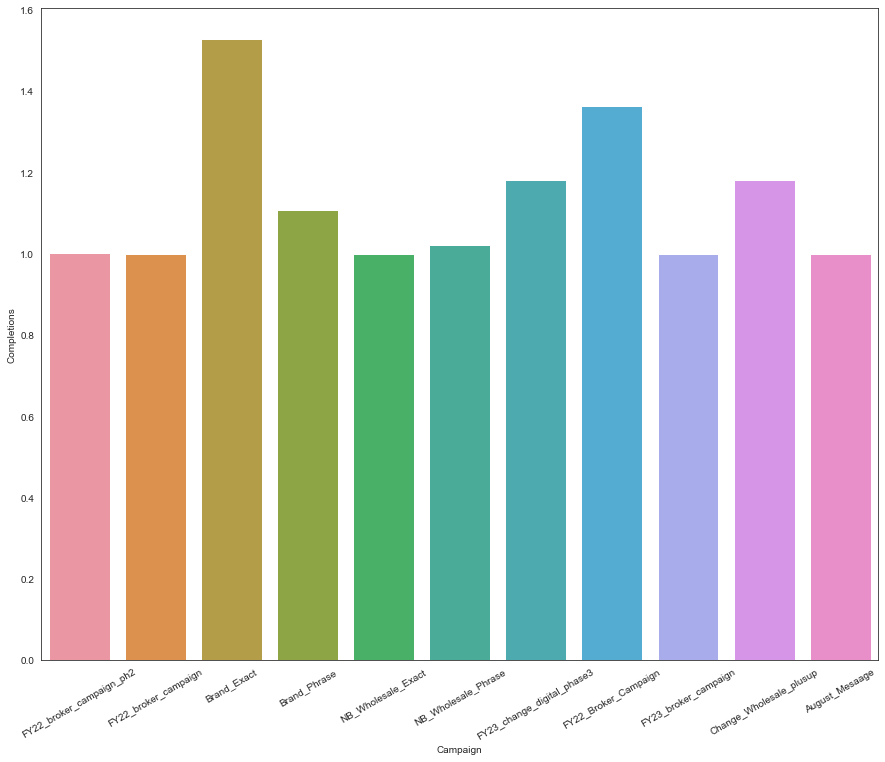

In [20]:
#Create a Barplot
plt.figure(figsize=(15, 12))
#Set the colour/plot style
sns.set_style('white')

sns.barplot(x='Campaign', y='Completions', data=GA_1_new3, ci=None)
plt.xticks(rotation=30)

Running same regression but with the original dataset partly cleaned - includes the not set campaigns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '(not set)'),
  Text(1, 0, 'FY22_broker_campaign_ph2'),
  Text(2, 0, 'FY22_broker_campaign'),
  Text(3, 0, 'Brand_Exact'),
  Text(4, 0, 'Brand_Phrase'),
  Text(5, 0, 'NB_Wholesale_Exact'),
  Text(6, 0, 'NB_Wholesale_Phrase'),
  Text(7, 0, 'FY23_change_digital_phase3'),
  Text(8, 0, 'FY22_Broker_Campaign'),
  Text(9, 0, 'FY23_broker_campaign'),
  Text(10, 0, 'Change_Wholesale_plusup'),
  Text(11, 0, 'August_Mesaage')])

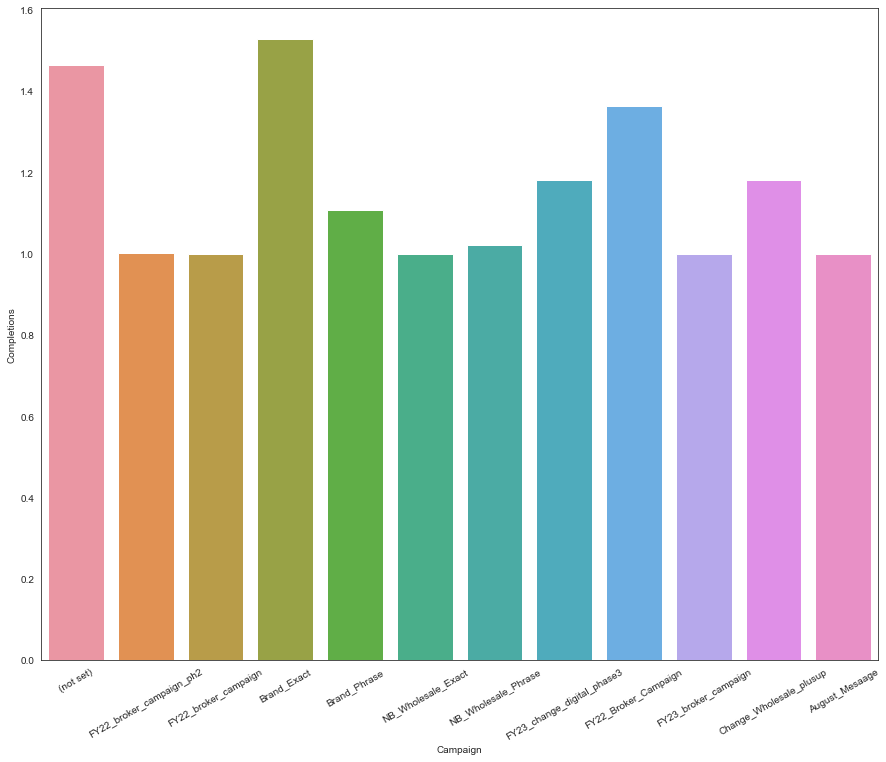

In [21]:
#Create a Barplot
plt.figure(figsize=(15, 12))
#Set the colour/plot style
sns.set_style('white')

sns.barplot(x='Campaign', y='Completions', data=GA_1_new, ci=None)
plt.xticks(rotation=30)

Text(0.5, 1.0, "The number of each audience's completions for each campaign")

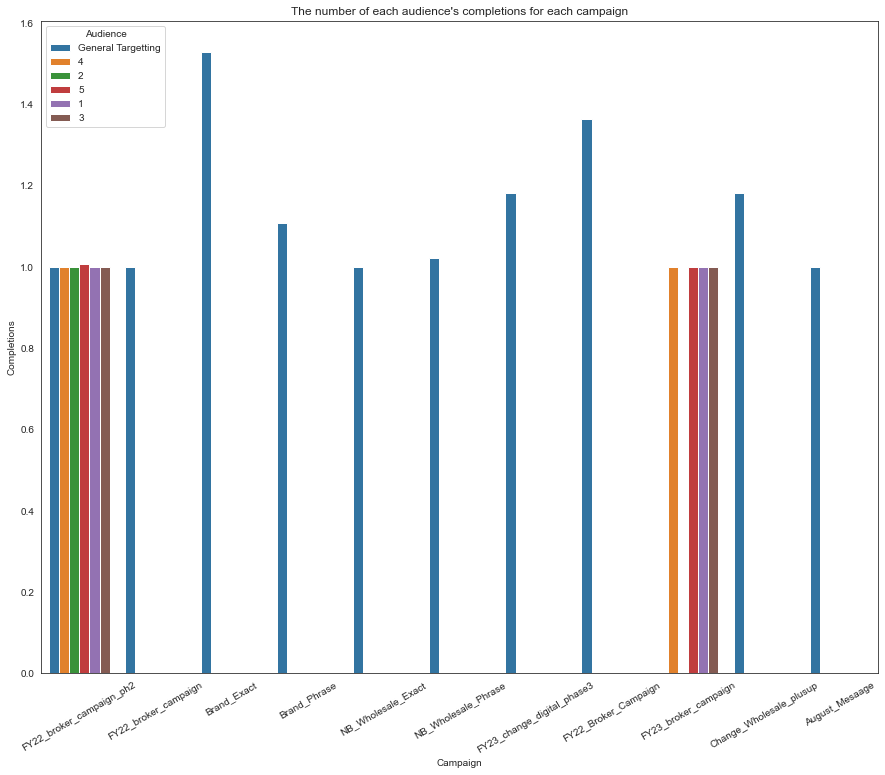

In [22]:
#Create a barplot
plt.figure(figsize=(15, 12))
#Set the colour/plot style
sns.set_style('white')

sns.barplot(x='Campaign', y='Completions', hue='Audience', data=GA_1_new3, ci=None)
plt.xticks(rotation=30)
plt.title("The number of each audience's completions for each campaign")

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'General Targetting'),
  Text(1, 0, '4'),
  Text(2, 0, '2'),
  Text(3, 0, '5'),
  Text(4, 0, '1'),
  Text(5, 0, '3')])

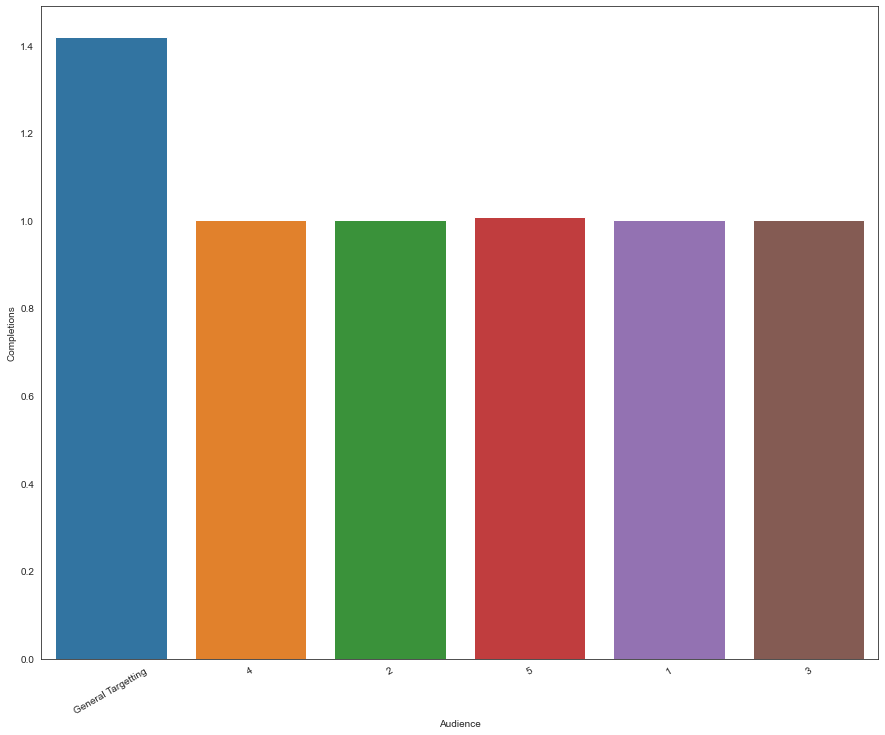

In [23]:
#Create a barplot
plt.figure(figsize=(15, 12))
#Set the colour/plot style
sns.set_style('white')

sns.barplot(x='Audience', y='Completions', data=GA_1_new3, ci=None)
plt.xticks(rotation=30)

## Assessing the success of different campaign elements

In [24]:
#Group by Campaign and Ad Format
GA_1_grouped3 = GA_1_new3.groupby(['Campaign','Ad Format']).sum()

In [25]:
#View Output
print(GA_1_grouped3)

                                                               Completions
Campaign                   Ad Format                                      
August_Mesaage             Housingwire                                 2.0
Brand_Exact                CPC                                      4021.0
Brand_Phrase               CPC                                       532.0
Change_Wholesale_plusup    Chrisman                                   39.0
FY22_Broker_Campaign       Video                                      15.0
FY22_broker_campaign       Single image                                8.0
FY22_broker_campaign_ph2   Carousel                                   36.0
                           National_mortgage_news                     17.0
                           Single image                              162.0
                           Video                                      73.0
FY23_broker_campaign       Animated                                    8.0
                         

In [26]:
#Group by Campaign, Ad Format and Goal
GA_1_grouped4 = GA_1_new3.groupby(['Campaign','Ad Format', 'Goal']).sum()

In [27]:
#View Output
print(GA_1_grouped4)

                                                                  Completions
Campaign            Ad Format   Goal                                         
August_Mesaage      Housingwire Start Closing More                        2.0
Brand_Exact         CPC         Broker Login                              2.0
                                Closer Twins Page Video Play              1.0
                                Form Submission                          44.0
                                Get Approved                            143.0
...                                                                       ...
NB_Wholesale_Phrase CPC         Get Approved                              2.0
                                Learn More (Closer Twins Banner)         10.0
                                Learn More (Community Mortgage)          47.0
                                Learn More (Our Story)                    9.0
                                Start Closing More              

Text(0.5, 1.0, "The number of each audience's completions for different Ad Formats")

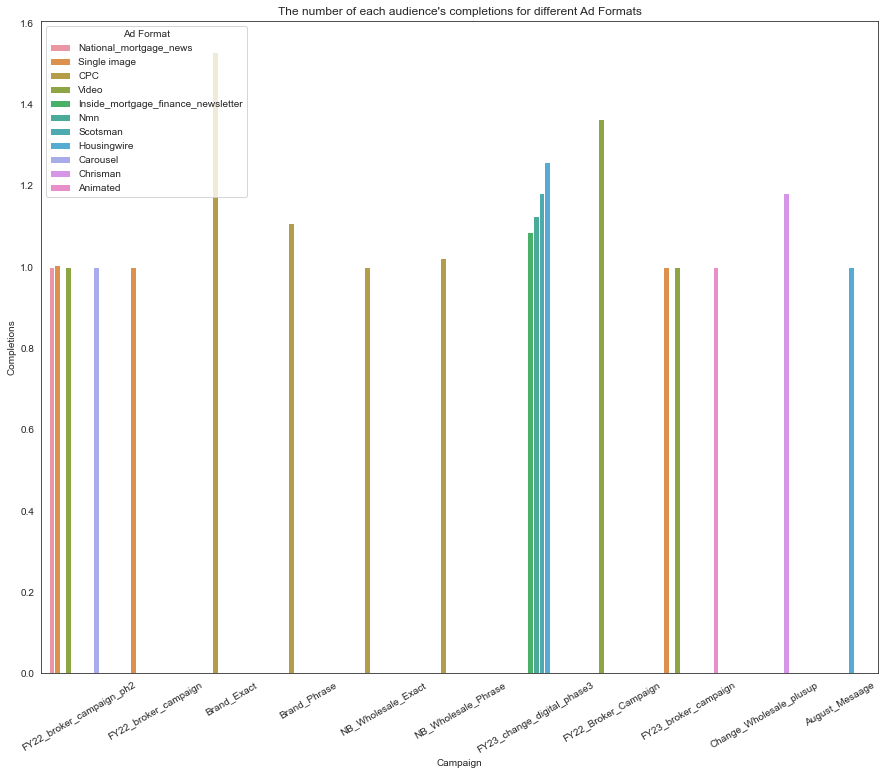

In [28]:
#Create a Barplot
plt.figure(figsize=(15, 12))
#Set the colour/plot style
sns.set_style('white')

sns.barplot(x='Campaign', y='Completions', hue='Ad Format', data=GA_1_new3, ci=None)
plt.xticks(rotation=30)
plt.title("The number of each audience's completions for different Ad Formats")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'National_mortgage_news'),
  Text(1, 0, 'Single image'),
  Text(2, 0, 'CPC'),
  Text(3, 0, 'Video'),
  Text(4, 0, 'Inside_mortgage_finance_newsletter'),
  Text(5, 0, 'Nmn'),
  Text(6, 0, 'Scotsman'),
  Text(7, 0, 'Housingwire'),
  Text(8, 0, 'Carousel'),
  Text(9, 0, 'Chrisman'),
  Text(10, 0, 'Animated')])

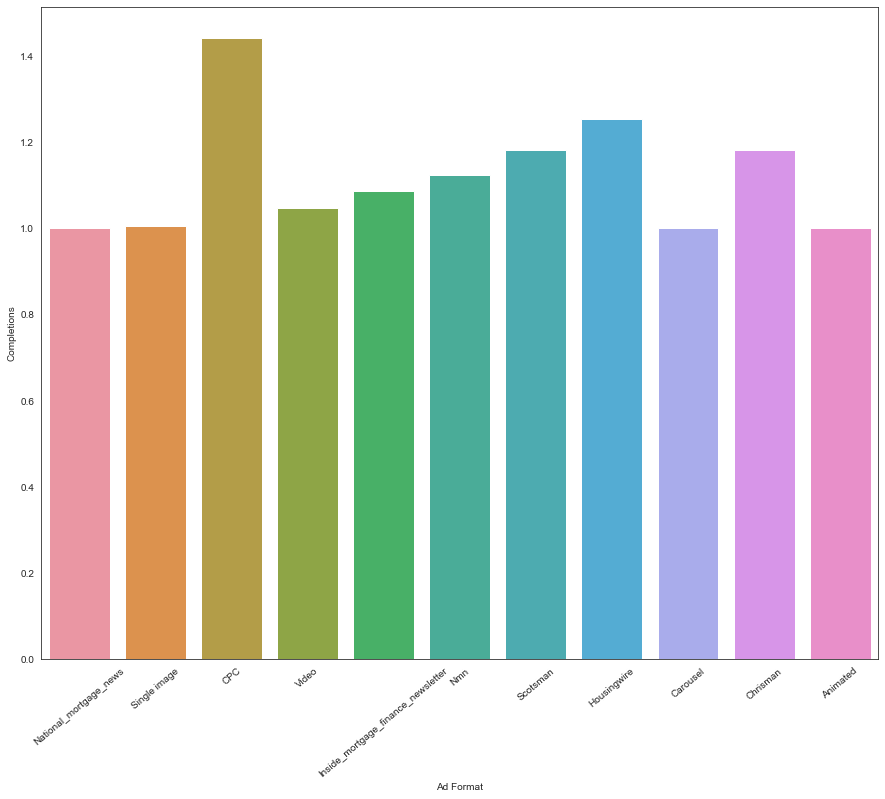

In [29]:
#Create a Barplot
plt.figure(figsize=(15, 12))
#Set the colour/plot style
sns.set_style('white')

sns.barplot(x='Ad Format', y='Completions', data=GA_1_new3, ci=None)
plt.xticks(rotation=40)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'National_mortgage_news'),
  Text(1, 0, 'Single image'),
  Text(2, 0, 'CPC'),
  Text(3, 0, 'Video'),
  Text(4, 0, 'Inside_mortgage_finance_newsletter'),
  Text(5, 0, 'Nmn'),
  Text(6, 0, 'Scotsman'),
  Text(7, 0, 'Housingwire'),
  Text(8, 0, 'Carousel'),
  Text(9, 0, 'Chrisman'),
  Text(10, 0, 'Animated')])

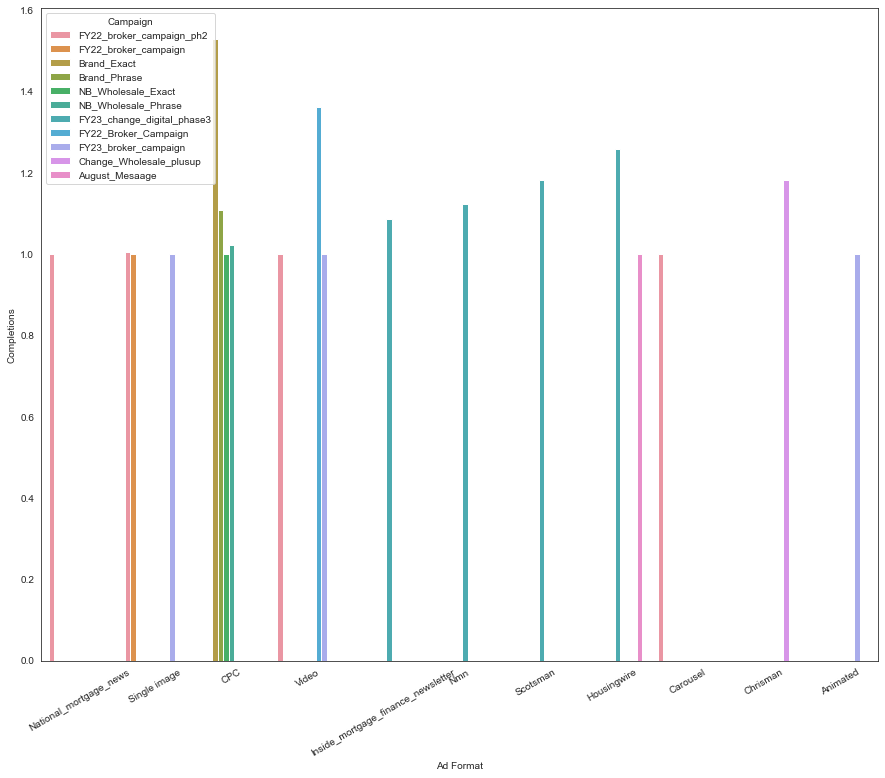

In [30]:
#Create a Barplot
plt.figure(figsize=(15, 12))
#Set the colour/plot style
sns.set_style('white')

sns.barplot(x='Ad Format', y='Completions', hue='Campaign', data=GA_1_new3, ci=None)
plt.xticks(rotation=30)

Text(0.5, 1.0, 'The number of Campaign completions for different Platforms')

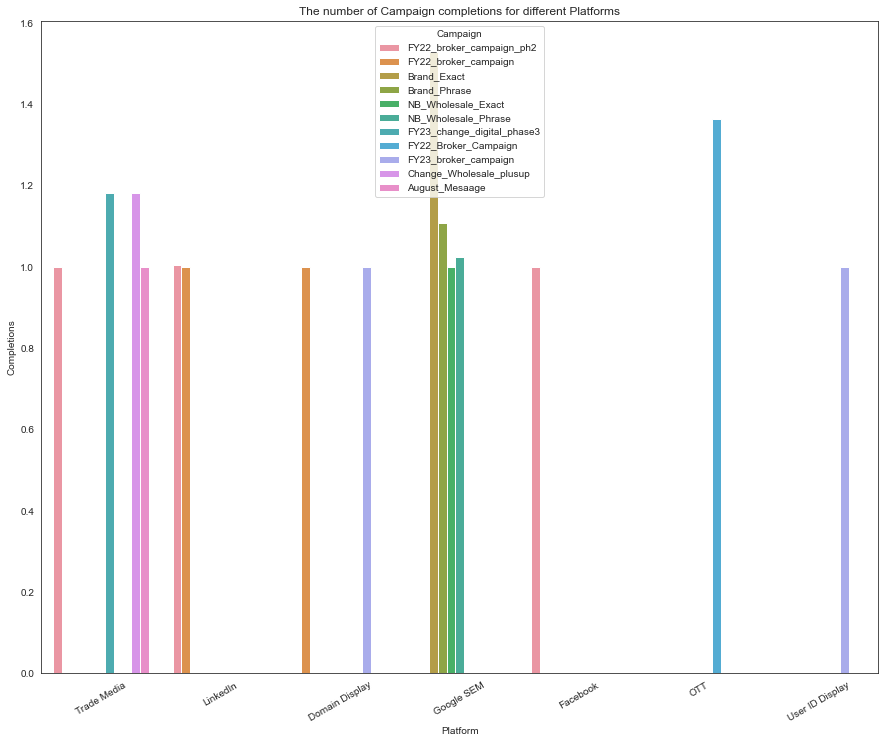

In [31]:
#Create a Barplot
plt.figure(figsize=(15, 12))
#Set the colour/plot style
sns.set_style('white')

sns.barplot(x='Platform', y='Completions', hue='Campaign', data=GA_1_new3, ci=None)
plt.xticks(rotation=30)
plt.title("The number of Campaign completions for different Platforms")

Text(0.5, 1.0, 'The number of Audience completions for different Platforms')

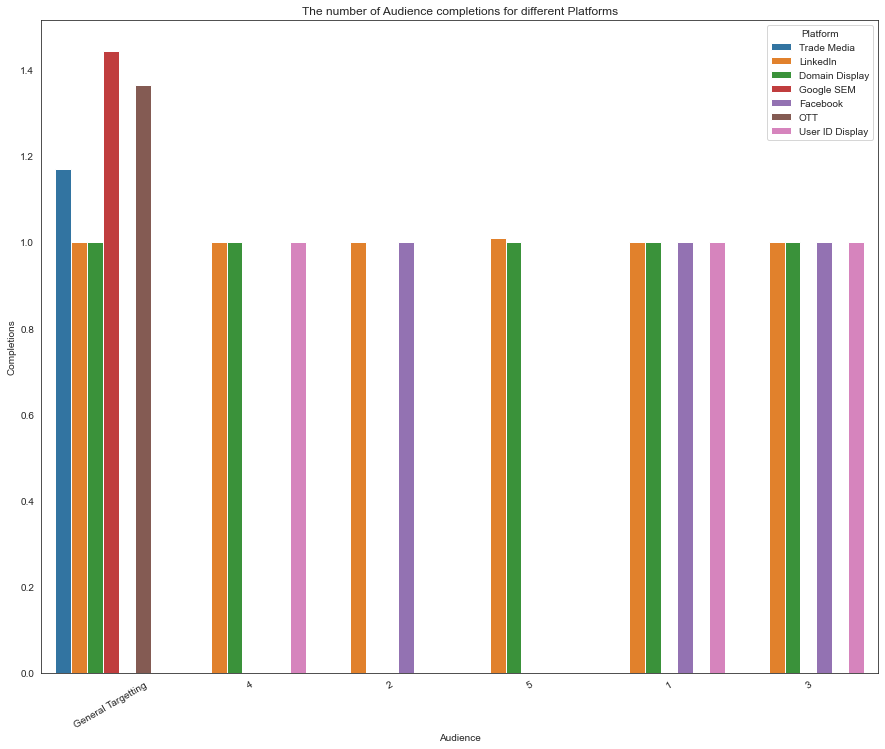

In [32]:
#Create a Barplot
plt.figure(figsize=(15, 12))
#Set the colour/plot style
sns.set_style('white')

sns.barplot(x='Audience', y='Completions', hue='Platform', data=GA_1_new3, ci=None)
plt.xticks(rotation=30)
plt.title("The number of Audience completions for different Platforms")

### Second DataFrame

In [33]:
#View Second DataFrame: General stats - web traffic
GA_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13194 entries, 0 to 13193
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     13194 non-null  datetime64[ns]
 1   Audience                 12430 non-null  object        
 2   Creative - Family        13194 non-null  object        
 3   Creative - Version       13194 non-null  object        
 4   Platform                 12821 non-null  object        
 5   Ad Format                7956 non-null   object        
 6   Campaign Traffic?        13194 non-null  object        
 7   Total Sessions           13194 non-null  float64       
 8   Total Bounces            13194 non-null  float64       
 9   Total Duration           13194 non-null  float64       
 10  Days away from max date  13194 non-null  float64       
 11  Latest report?           13194 non-null  int64         
dtypes: datetime64[ns](1), float64(4)

In [34]:
#Determine if there are any null values
GA_2.isnull().sum()

Date                          0
Audience                    764
Creative - Family             0
Creative - Version            0
Platform                    373
Ad Format                  5238
Campaign Traffic?             0
Total Sessions                0
Total Bounces                 0
Total Duration                0
Days away from max date       0
Latest report?                0
dtype: int64

In [35]:
#Creating new dataframe with no missing values 
GA_2_new = GA_2.dropna()

#View new dataframe
print(GA_2_new)

            Date            Audience Creative - Family     Creative - Version  \
1     2022-06-16                   3       CloseFaster                  NoDTI   
3     2022-06-09                   4   UnfairAdvantage                  1page   
4     2022-08-03                   1   UnfairAdvantage                 1099.0   
9     2022-06-15  General Targetting           SEM Ads  We Are America's CDFI   
11    2022-04-30                   4   UnfairAdvantage                  NoDTI   
...          ...                 ...               ...                    ...   
13187 2022-06-30                   1       CloserTwins               Faceoff1   
13188 2022-09-24                   1   UnfairAdvantage                  NoDTI   
13189 2022-05-06                   4       CloserTwins              Cutdown1B   
13190 2022-06-01                   1   UnfairAdvantage                  NoDTI   
13192 2022-09-07                   3       CloserTwins              EarlyBird   

              Platform     

In [40]:
#Viewing the first five rows of the cleaned dataset 
GA_2_new.head(5)

,Date,Audience,Creative - Family,Creative - Version,Platform,Ad Format,Campaign Traffic?,Total Sessions,Total Bounces,Total Duration,Days away from max date,Latest report?
1,2022-06-16,3,CloseFaster,NoDTI,Facebook,Single image,Campaign,1.0,0.0,0.0,137.0,0
3,2022-06-09,4,UnfairAdvantage,1page,LinkedIn,Single image,Campaign,2.0,0.0,50.0,144.0,0
4,2022-08-03,1,UnfairAdvantage,1099.0,Domain Display,Single image,Campaign,1.0,0.0,0.0,89.0,0
9,2022-06-15,General Targetting,SEM Ads,We Are America's CDFI,Google SEM,CPC,Campaign,5.0,0.0,184.0,138.0,0
11,2022-04-30,4,UnfairAdvantage,NoDTI,LinkedIn,Single image,Campaign,1.0,0.0,0.0,184.0,0


Things to note:
- Above command shows there are missing values in some columns. Therefore we can remove these individualds from the dataset.
- In the Audience column if we look at the options there should be only 6 different audiences. However there is a category of test6 and fivedisparate that do not fit. Therefore, need to remove these

In [41]:
#Creating new dataframe which removes incorrect information 
GA_2_new2 = GA_2_new[GA_2_new["Audience"].str.contains("test6|fivedisparate") == False]

In [42]:
#Viewing the most recently cleaned dataset 
print(GA_2_new2)

            Date            Audience Creative - Family     Creative - Version  \
1     2022-06-16                   3       CloseFaster                  NoDTI   
3     2022-06-09                   4   UnfairAdvantage                  1page   
4     2022-08-03                   1   UnfairAdvantage                 1099.0   
9     2022-06-15  General Targetting           SEM Ads  We Are America's CDFI   
11    2022-04-30                   4   UnfairAdvantage                  NoDTI   
...          ...                 ...               ...                    ...   
13187 2022-06-30                   1       CloserTwins               Faceoff1   
13188 2022-09-24                   1   UnfairAdvantage                  NoDTI   
13189 2022-05-06                   4       CloserTwins              Cutdown1B   
13190 2022-06-01                   1   UnfairAdvantage                  NoDTI   
13192 2022-09-07                   3       CloserTwins              EarlyBird   

              Platform     

### Third DataFrame

In [43]:
#View Third DataFrame: Change_2022_Google Analytics Ma
GA_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47529 entries, 0 to 47528
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   City, Country            47529 non-null  object        
 1   Audience                 47140 non-null  object        
 2   Campaign                 47529 non-null  object        
 3   Date                     47529 non-null  datetime64[ns]
 4   Platform                 47528 non-null  object        
 5   Ad Format                29519 non-null  object        
 6   Creative - Family        47529 non-null  object        
 7   Creative - Version       47529 non-null  object        
 8   Total Sessions           47529 non-null  float64       
 9   Days away from max date  47529 non-null  float64       
 10  Latest report?           47529 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 4.0+ MB


In [44]:
#View the first five rows
GA_3.head(5)

,"City, Country",Audience,Campaign,Date,Platform,Ad Format,Creative - Family,Creative - Version,Total Sessions,Days away from max date,Latest report?
0,"Ashburn, United States",General Targetting,FY23_change_digital_phase3,2022-08-08,Trade Media,Inside_mortgage_finance_newsletter,CloserTwins,RTB,1.0,84.0,0
1,"Mebane, United States",4,FY23_broker_campaign,2022-06-16,User ID Display,NaN,UnfairAdvantage,OnePage,1.0,137.0,0
2,"Chicago, United States",2,FY23_broker_campaign,2022-06-05,Domain Display,Single image,UnfairAdvantage,NoDTI,2.0,148.0,0
3,"South Jordan, United States",1,FY23_broker_campaign,2022-09-02,User ID Display,NaN,CloserTwins,MoreLoansAll,1.0,59.0,0
4,"Potsdam, United States",4,FY23_broker_campaign,2022-10-30,Domain Display,NaN,UnfairAdvantage,1099.0,1.0,1.0,1


In [45]:
#Determine if there are any null values
GA_3.isnull().sum()

City, Country                  0
Audience                     389
Campaign                       0
Date                           0
Platform                       1
Ad Format                  18010
Creative - Family              0
Creative - Version             0
Total Sessions                 0
Days away from max date        0
Latest report?                 0
dtype: int64

In [46]:
#Creating new dataframe with no missing values 
GA_3_new = GA_3.dropna()

#View new dataframe
print(GA_3_new)

                     City, Country            Audience  \
0           Ashburn, United States  General Targetting   
2           Chicago, United States                   2   
5      Jacksonville, United States                   4   
6        Pocahontas, United States                   5   
7           Suwanee, United States  General Targetting   
...                            ...                 ...   
47522       Connell, United States                   5   
47523         Worth, United States  General Targetting   
47526        Boston, United States                   5   
47527     Cleveland, United States                   5   
47528     Charlotte, United States                   3   

                         Campaign       Date        Platform  \
0      FY23_change_digital_phase3 2022-08-08     Trade Media   
2            FY23_broker_campaign 2022-06-05  Domain Display   
5            FY23_broker_campaign 2022-10-19  Domain Display   
6            FY23_broker_campaign 2022-10-26  D

Things to note:
- Above command shows there are missing values in some columns. Therefore we can remove these individualds from the dataset.
- In the Audience column if we look at the options there should be only 6 different audiences. However there is a category of fivedisparate that does not fit. Therefore, need to remove these

In [47]:
#Creating new dataframe which removes incorrect information 
GA_3_new2 = GA_3_new[GA_3_new["Audience"].str.contains("fivedisparate") == False]

In [48]:
#Viewing the most recently cleaned dataset 
print(GA_3_new2)

                     City, Country            Audience  \
0           Ashburn, United States  General Targetting   
2           Chicago, United States                   2   
5      Jacksonville, United States                   4   
6        Pocahontas, United States                   5   
7           Suwanee, United States  General Targetting   
...                            ...                 ...   
47522       Connell, United States                   5   
47523         Worth, United States  General Targetting   
47526        Boston, United States                   5   
47527     Cleveland, United States                   5   
47528     Charlotte, United States                   3   

                         Campaign       Date        Platform  \
0      FY23_change_digital_phase3 2022-08-08     Trade Media   
2            FY23_broker_campaign 2022-06-05  Domain Display   
5            FY23_broker_campaign 2022-10-19  Domain Display   
6            FY23_broker_campaign 2022-10-26  D

## Creative DataSet

In [21]:
#Read excel file from the current working directory
CD = pd.read_excel('EP - Change 2022 Creative Data writeback_091122.xlsx')

In [22]:
#View DataFrame
CD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102068 entries, 0 to 102067
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Requested URL Path       14205 non-null   object        
 1   Campaign                 101996 non-null  object        
 2   Ad Format                101997 non-null  object        
 3   Clicks                   90191 non-null   float64       
 4   Spend                    102068 non-null  object        
 5   Creative - Size          73485 non-null   object        
 6   Date                     102068 non-null  datetime64[ns]
 7   Impressions              102068 non-null  float64       
 8   Reach                    80824 non-null   float64       
 9   Audience                 102027 non-null  object        
 10  Platform                 102068 non-null  object        
 11  Creative - Family        101185 non-null  object        
 12  Creative - Versi

In [23]:
#View the first five rows
CD.head(5)
print(CD)

                                       Requested URL Path      Campaign  \
0       https://graph.facebook.com/v12.0/act_109970164...          FY22   
1       https://graph.facebook.com/v12.0/act_109970164...          FY22   
2       https://graph.facebook.com/v12.0/act_109970164...          FY22   
3       https://graph.facebook.com/v12.0/act_109970164...          FY22   
4       https://graph.facebook.com/v12.0/act_109970164...          FY22   
...                                                   ...           ...   
102063                                                NaN          ESPN   
102064                                                NaN           MTV   
102065                                                NaN  Food Network   
102066                                                NaN    Nat Geo TV   
102067                                                NaN         Pluto   

           Ad Format  Clicks Spend Creative - Size       Date  Impressions  \
0       Single image 

In [24]:
#Determine if there are any null values
CD.isnull().sum()

Requested URL Path         87863
Campaign                      72
Ad Format                     71
Clicks                     11877
Spend                          0
Creative - Size            28583
Date                           0
Impressions                    0
Reach                      21244
Audience                      41
Platform                       0
Creative - Family            883
Creative - Version           525
100% Video Views           77621
Video Starts               76608
Follows                    93668
Days away from max date        0
Latest report?                 0
CTR                        12829
CTR Score                  27050
Weighted CTR Score         27050
dtype: int64

Things to note:
- Above command shows there are missing values in some columns. Therefore we can remove these individualds from the dataset. However, in some columns there is no data for anything. For example, the creative size column has no data at all. So must be careful when clearing the data.
- Instead observing the column, choose to delete columns where there are missing data in the Campaign, Ad Format, Clicks, Date, Impressions, Reach, Audience, Platform, Creative-Family, Creative - Version, 100% Video, Video Starts, Follows, CTR, CTR Score, Weighted CTR
- In the Audience column if we look at the options there should be only 6 different audiences. However there is a category of domain targetting which doesn't fit. We can remove these individuals from the dataset.

In [1]:
#Creating new dataframe with no missing values 
CD_new = CD.dropna(subset = ['Campaign', 'Ad Format', 'Clicks','Reach', 'Audience','Creative - Family','Creative - Version',
                            '100% Video Views', 'Video Starts', 'Follows', 'CTR', 'CTR Score'])


NameError: name 'CD' is not defined

In [2]:
#View new dataframe
print(CD_new)

NameError: name 'CD_new' is not defined

In [27]:
#Remove the unnecessary columns
CD_new2 = CD_new.drop(['Requested URL Path','Creative - Size','100% Video Views','Video Starts','Days away from max date',
                       'Latest report?'],axis=1)

In [28]:
#View new dataframe
print(CD_new2)

                                        Campaign     Ad Format  Clicks  \
764                             Audience 3 - DSC  Single image     0.0   
766                             Audience 3 - DSC  Single image     0.0   
1240                   Audience 5 - Carousel Ads      Carousel     3.0   
1398                            Audience 4 - DSC  Single image     0.0   
1436                            Audience 4 - DSC  Single image     2.0   
...                                          ...           ...     ...   
57589  Competitive Opportunity Campaign April 22  Single image    12.0   
57602  Competitive Opportunity Campaign April 22  Single image    13.0   
57603  Competitive Opportunity Campaign April 22  Single image     7.0   
57604  Competitive Opportunity Campaign April 22  Single image    10.0   
57605  Competitive Opportunity Campaign April 22  Single image     8.0   

            Spend       Date  Impressions   Reach            Audience  \
764      0.449945 2022-07-16          

In [29]:
#Group by Campaign and Audience
CD_new2_grouped = CD_new2.groupby(['Campaign','Audience']).sum()

#View Output
print(CD_new2_grouped)

                                                              Clicks  \
Campaign                                  Audience                     
Audience 1 - Carousel Ads                 1                     34.0   
Audience 1 - DSC                          1                    193.0   
Audience 1 - Video                        1                    137.0   
Audience 2 - Carousel Ads                 2                     84.0   
Audience 2 - DSC                          2                     59.0   
Audience 2 - Video                        2                     60.0   
Audience 3 - Carousel Ads                 3                     12.0   
Audience 3 - DSC                          3                     44.0   
Audience 3 - Video                        3                     54.0   
Audience 4 - Carousel Ads                 4                    716.0   
Audience 4 - DSC                          4                   1055.0   
Audience 4 - Video                        4                    3

In [30]:
#Group by Campaign, Audience and Goal
CD_new2_grouped2 = CD_new2.groupby(['Campaign','Audience', 'CTR']).sum()

#View Output
print(CD_new2_grouped2)

                                                                       Clicks  \
Campaign                                  Audience           CTR                
Audience 1 - Carousel Ads                 1                  0.000000     0.0   
                                                             0.003610     1.0   
                                                             0.004065     1.0   
                                                             0.007246     1.0   
                                                             0.007519     1.0   
...                                                                       ...   
Competitive Opportunity Campaign April 22 General Targetting 0.012821     7.0   
                                                             0.013436     7.0   
                                                             0.015528     5.0   
                                                             0.016129     8.0   
                            

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Audience 3 - DSC'),
  Text(1, 0, 'Audience 5 - Carousel Ads'),
  Text(2, 0, 'Audience 4 - DSC'),
  Text(3, 0, 'Audience 4 - Carousel Ads'),
  Text(4, 0, 'Audience 5 - DSC'),
  Text(5, 0, 'Audience 2 - Video'),
  Text(6, 0, 'Audience 1 - Carousel Ads'),
  Text(7, 0, 'Audience 4 - Video'),
  Text(8, 0, 'Audience 2 - DSC'),
  Text(9, 0, 'Audience 1 - DSC'),
  Text(10, 0, 'Audience 1 - Video'),
  Text(11, 0, 'Audience 2 - Carousel Ads'),
  Text(12, 0, 'Audience 3 - Video'),
  Text(13, 0, 'Audience 3 - Carousel Ads'),
  Text(14, 0, 'Audience 5 - Video'),
  Text(15, 0, 'Competitive Opportunity Campaign April 22')])

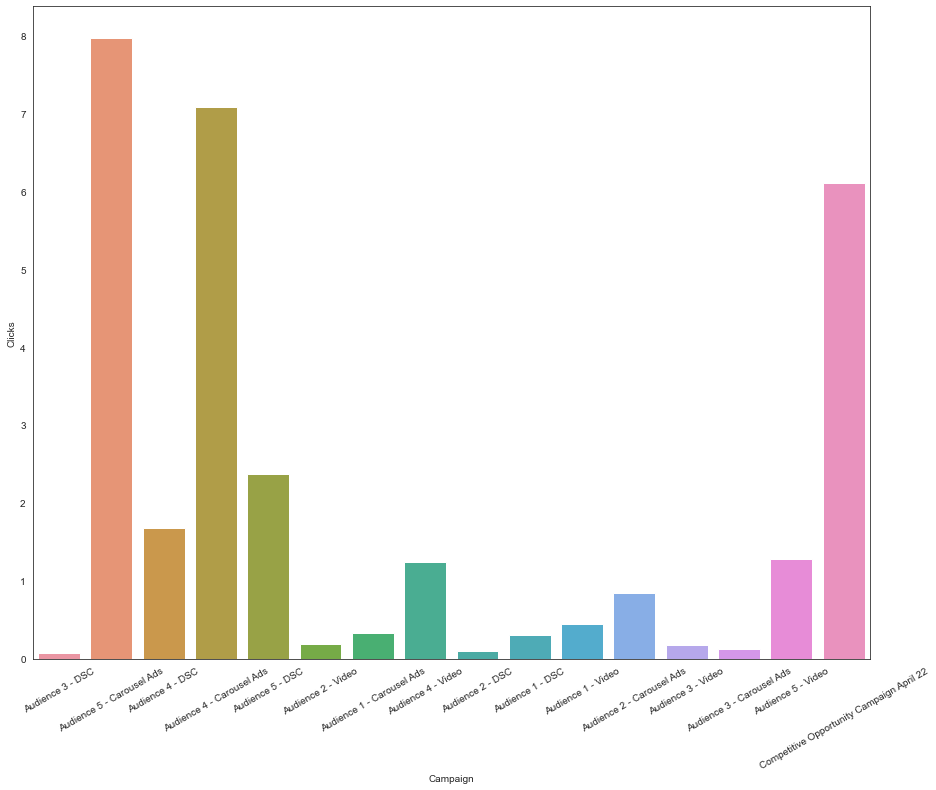

In [31]:
#Create a Barplot
plt.figure(figsize=(15, 12))
#Set the colour/plot style
sns.set_style('white')

sns.barplot(x='Campaign', y='Clicks', data=CD_new2, ci=None)
plt.xticks(rotation=30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Audience 3 - DSC'),
  Text(1, 0, 'Audience 5 - Carousel Ads'),
  Text(2, 0, 'Audience 4 - DSC'),
  Text(3, 0, 'Audience 4 - Carousel Ads'),
  Text(4, 0, 'Audience 5 - DSC'),
  Text(5, 0, 'Audience 2 - Video'),
  Text(6, 0, 'Audience 1 - Carousel Ads'),
  Text(7, 0, 'Audience 4 - Video'),
  Text(8, 0, 'Audience 2 - DSC'),
  Text(9, 0, 'Audience 1 - DSC'),
  Text(10, 0, 'Audience 1 - Video'),
  Text(11, 0, 'Audience 2 - Carousel Ads'),
  Text(12, 0, 'Audience 3 - Video'),
  Text(13, 0, 'Audience 3 - Carousel Ads'),
  Text(14, 0, 'Audience 5 - Video'),
  Text(15, 0, 'Competitive Opportunity Campaign April 22')])

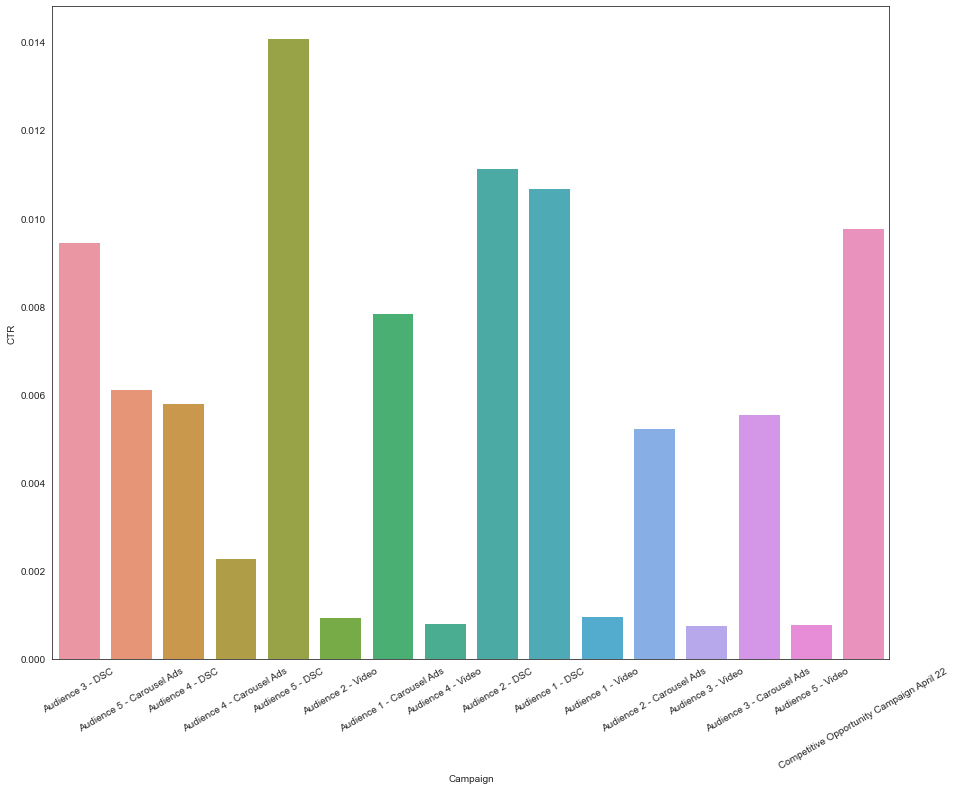

In [32]:
#Create a Barplot
plt.figure(figsize=(15, 12))
#Set the colour/plot style
sns.set_style('white')

sns.barplot(x='Campaign', y='CTR', data=CD_new2, ci=None)
plt.xticks(rotation=30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Audience 3 - DSC'),
  Text(1, 0, 'Audience 5 - Carousel Ads'),
  Text(2, 0, 'Audience 4 - DSC'),
  Text(3, 0, 'Audience 4 - Carousel Ads'),
  Text(4, 0, 'Audience 5 - DSC'),
  Text(5, 0, 'Audience 2 - Video'),
  Text(6, 0, 'Audience 1 - Carousel Ads'),
  Text(7, 0, 'Audience 4 - Video'),
  Text(8, 0, 'Audience 2 - DSC'),
  Text(9, 0, 'Audience 1 - DSC'),
  Text(10, 0, 'Audience 1 - Video'),
  Text(11, 0, 'Audience 2 - Carousel Ads'),
  Text(12, 0, 'Audience 3 - Video'),
  Text(13, 0, 'Audience 3 - Carousel Ads'),
  Text(14, 0, 'Audience 5 - Video'),
  Text(15, 0, 'Competitive Opportunity Campaign April 22')])

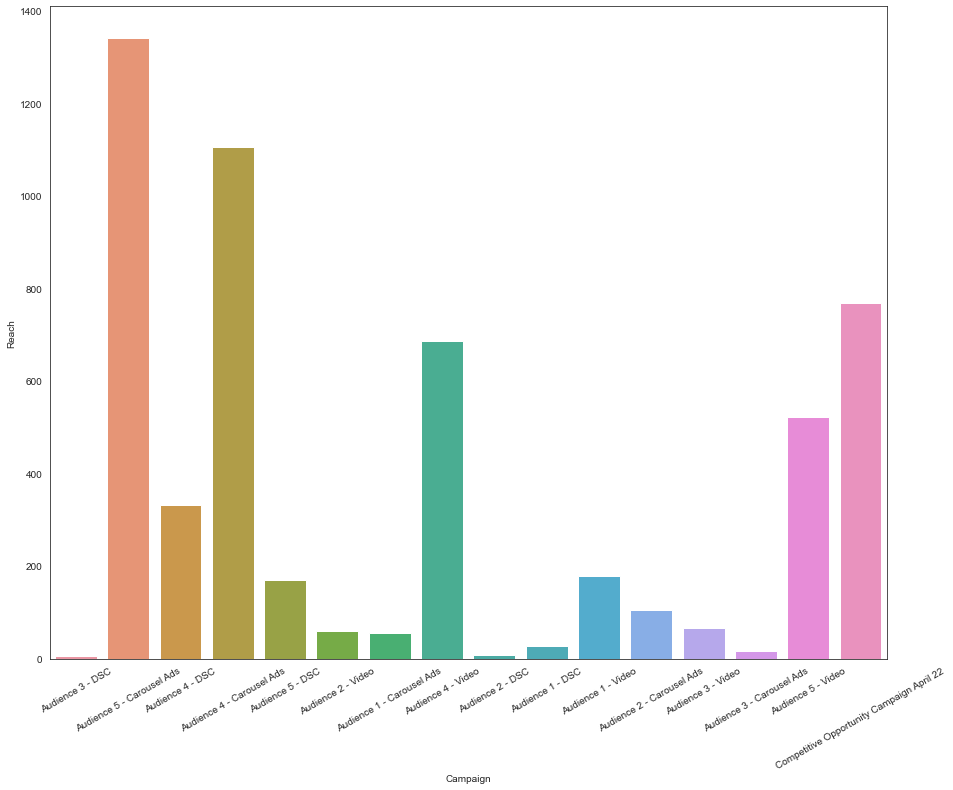

In [33]:
#Create a Barplot
plt.figure(figsize=(15, 12))
#Set the colour/plot style
sns.set_style('white')

sns.barplot(x='Campaign', y='Reach', data=CD_new2, ci=None)
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '3'),
  Text(1, 0, '5'),
  Text(2, 0, '4'),
  Text(3, 0, '2'),
  Text(4, 0, '1'),
  Text(5, 0, 'General Targetting')])

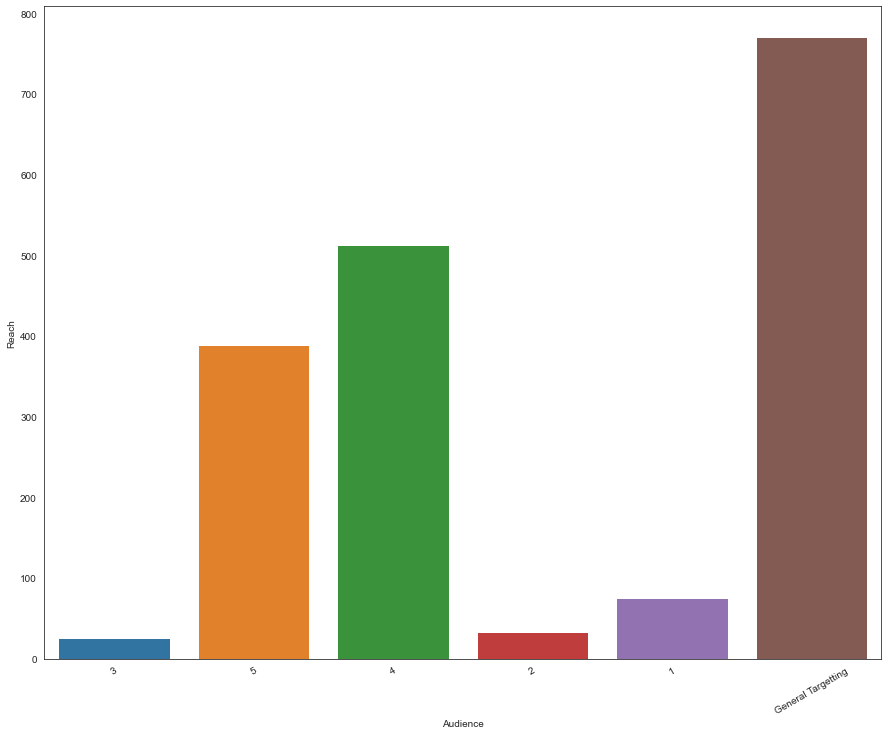

In [77]:
#Create a Barplot
plt.figure(figsize=(15, 12))
#Set the colour/plot style
sns.set_style('white')

sns.barplot(x='Audience', y='Reach', data=CD_new2, ci=None)
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '3'),
  Text(1, 0, '5'),
  Text(2, 0, '4'),
  Text(3, 0, '2'),
  Text(4, 0, '1'),
  Text(5, 0, 'General Targetting')])

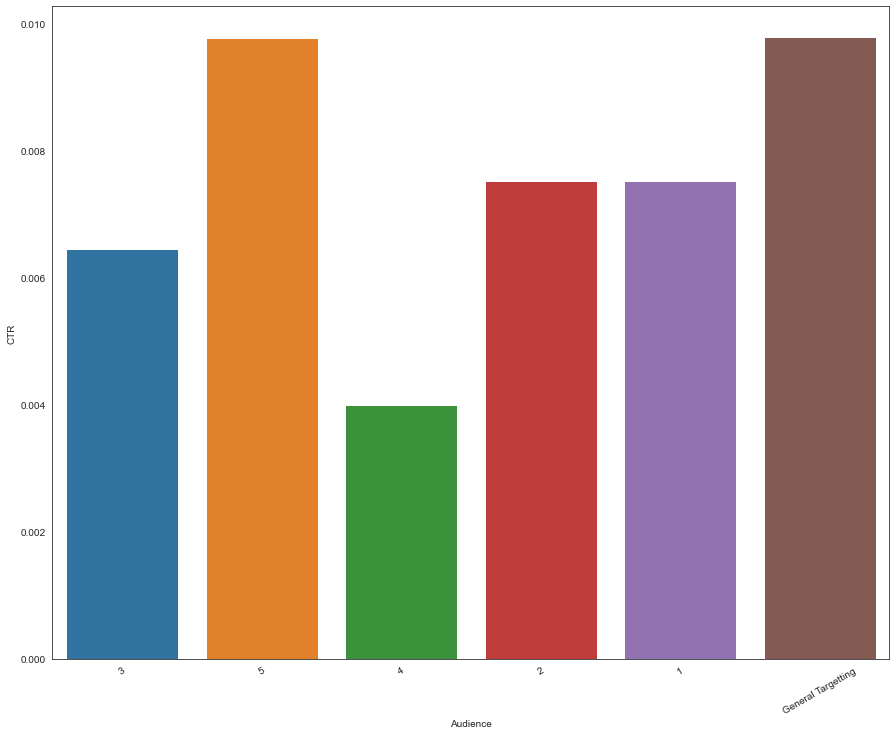

In [34]:
#Create a Barplot
plt.figure(figsize=(15, 12))
#Set the colour/plot style
sns.set_style('white')

sns.barplot(x='Audience', y='CTR', data=CD_new2, ci=None)
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '3'),
  Text(1, 0, '5'),
  Text(2, 0, '4'),
  Text(3, 0, '2'),
  Text(4, 0, '1'),
  Text(5, 0, 'General Targetting')])

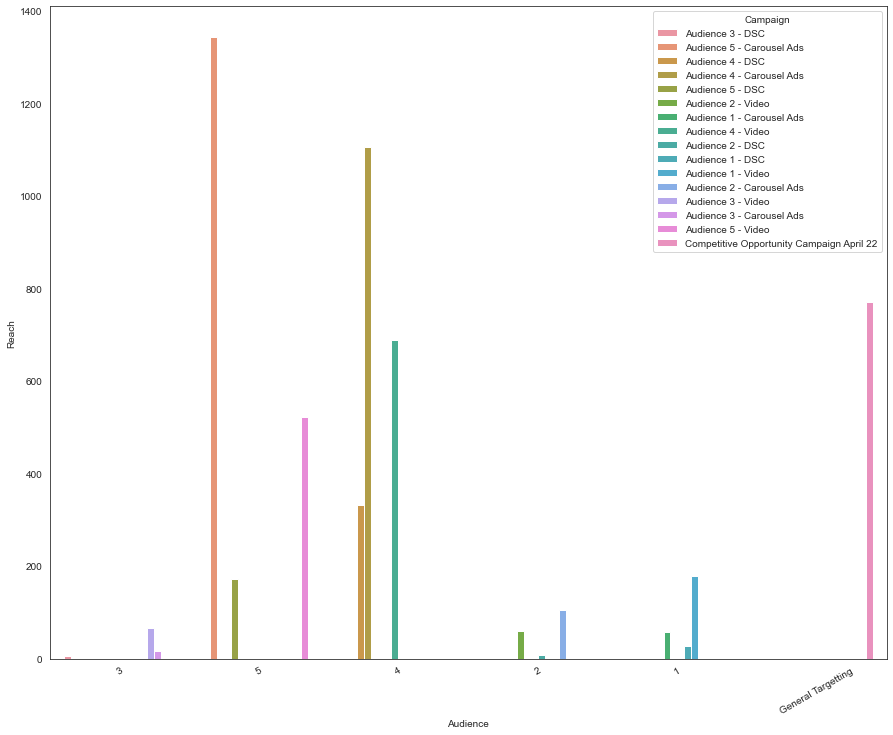

In [70]:
#Create a barplot
plt.figure(figsize=(15, 12))
#Set the colour/plot style
sns.set_style('white')

sns.barplot(x='Audience', y='Reach', hue='Campaign', data=CD_new2, ci=None)
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '3'),
  Text(1, 0, '5'),
  Text(2, 0, '4'),
  Text(3, 0, '2'),
  Text(4, 0, '1'),
  Text(5, 0, 'General Targetting')])

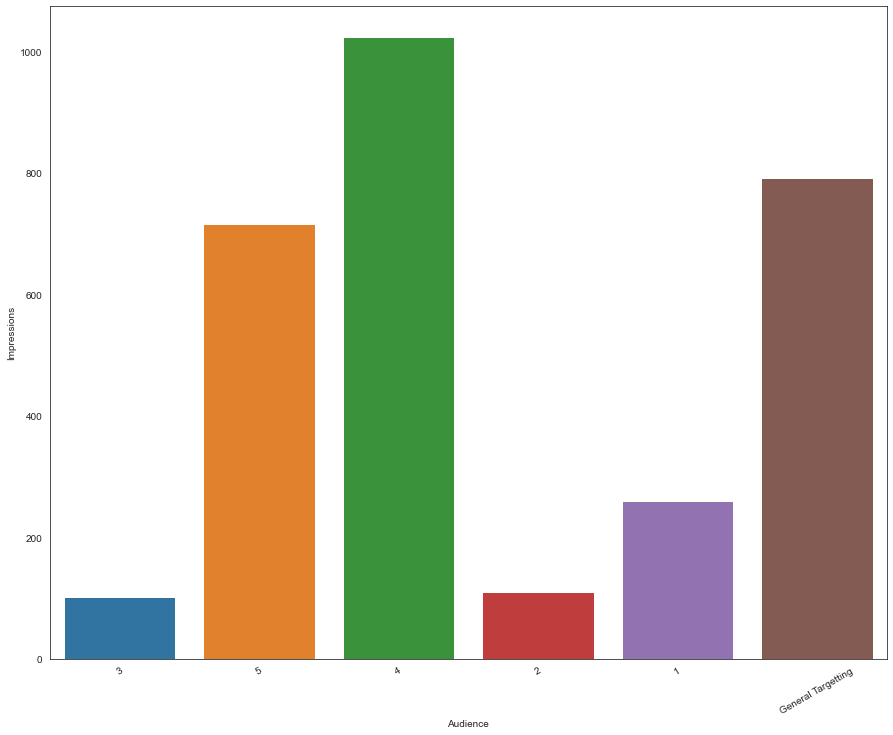

In [75]:
#Create a Barplot
plt.figure(figsize=(15, 12))
#Set the colour/plot style
sns.set_style('white')

sns.barplot(x='Audience', y='Impressions', data=CD_new2, ci=None)
plt.xticks(rotation=30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Audience 3 - DSC'),
  Text(1, 0, 'Audience 5 - Carousel Ads'),
  Text(2, 0, 'Audience 4 - DSC'),
  Text(3, 0, 'Audience 4 - Carousel Ads'),
  Text(4, 0, 'Audience 5 - DSC'),
  Text(5, 0, 'Audience 2 - Video'),
  Text(6, 0, 'Audience 1 - Carousel Ads'),
  Text(7, 0, 'Audience 4 - Video'),
  Text(8, 0, 'Audience 2 - DSC'),
  Text(9, 0, 'Audience 1 - DSC'),
  Text(10, 0, 'Audience 1 - Video'),
  Text(11, 0, 'Audience 2 - Carousel Ads'),
  Text(12, 0, 'Audience 3 - Video'),
  Text(13, 0, 'Audience 3 - Carousel Ads'),
  Text(14, 0, 'Audience 5 - Video'),
  Text(15, 0, 'Competitive Opportunity Campaign April 22')])

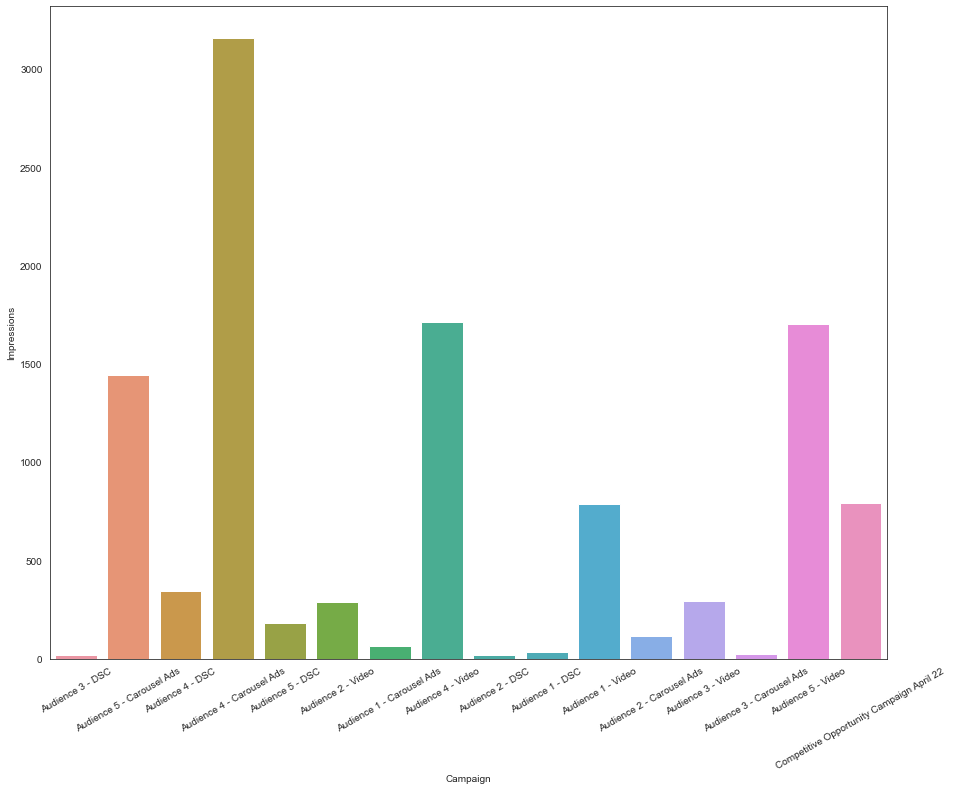

In [76]:
#Create a Barplot
plt.figure(figsize=(15, 12))
#Set the colour/plot style
sns.set_style('white')

sns.barplot(x='Campaign', y='Impressions', data=CD_new2, ci=None)
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '3'),
  Text(1, 0, '5'),
  Text(2, 0, '4'),
  Text(3, 0, '2'),
  Text(4, 0, '1'),
  Text(5, 0, 'General Targetting')])

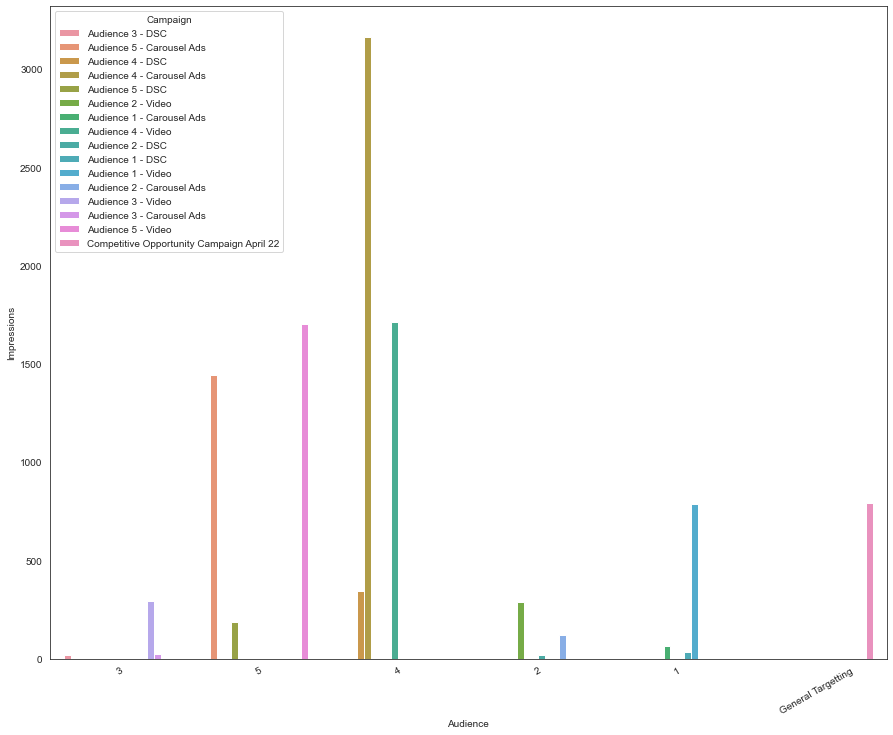

In [74]:
#Create a barplot
plt.figure(figsize=(15, 12))
#Set the colour/plot style
sns.set_style('white')

sns.barplot(x='Audience', y='Impressions', hue='Campaign', data=CD_new2, ci=None)
plt.xticks(rotation=30)